In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Sep 11 11:05:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#August - 2023

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 6.69 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla V100-SXM2-16GB!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.6/499.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 415.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# import cudf
# import cuml
import os
import numpy as np
import pandas as pd

In [ ]:
!curl -O https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Electronics_5.json.gz


In [ ]:
%%time
df = pd.read_json('/content/Electronics_5.json.gz')

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [ ]:
### load the meta data

data = []
with gzip.open('/content/Electronics_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

In [ ]:
df.head()

In [ ]:
df.to_parquet('/content/drive/MyDrive/Colab Notebooks/data/amazon_electronics')

#Old dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amazon_reviews_us_Electronics_v1_00.tsv.gz', sep = '\t', error_bad_lines =False)
df.head()

Skipping line 466560: expected 15 fields, saw 22
Skipping line 486823: expected 15 fields, saw 22
Skipping line 489036: expected 15 fields, saw 22
Skipping line 496148: expected 15 fields, saw 22
Skipping line 522330: expected 15 fields, saw 22

Skipping line 552961: expected 15 fields, saw 22
Skipping line 577388: expected 15 fields, saw 22
Skipping line 582182: expected 15 fields, saw 22

Skipping line 590653: expected 15 fields, saw 22
Skipping line 608846: expected 15 fields, saw 22
Skipping line 615442: expected 15 fields, saw 22
Skipping line 645607: expected 15 fields, saw 22
Skipping line 654323: expected 15 fields, saw 22

Skipping line 714935: expected 15 fields, saw 22

Skipping line 749608: expected 15 fields, saw 22
Skipping line 753868: expected 15 fields, saw 22
Skipping line 762504: expected 15 fields, saw 22
Skipping line 771706: expected 15 fields, saw 22
Skipping line 773376: expected 15 fields, saw 22

Skipping line 792407: expected 15 fields, saw 22
Skipping line 7

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [ ]:
%%time
df = df.dropna(subset = ['product_title','review_body','review_date','review_headline'])
df = df[['review_body','star_rating']]
df = df.drop_duplicates(subset = ['review_body'], keep = 'first')
df.shape

CPU times: user 6.95 s, sys: 354 ms, total: 7.3 s
Wall time: 7.36 s


(2894777, 2)

In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
%matplotlib inline

import warnings
from scipy import stats
warnings.filterwarnings('ignore')


In [ ]:
df.isnull().sum()

review_body    0
star_rating    0
dtype: int64

In [ ]:
# df = df.dropna(subset = ['product_title','review_body','review_date','review_headline'])
# df.shape

In [ ]:
print ("================================================")
total = len(df)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df.review_id.unique()))
reviewer_prop = float(len(df.customer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(df.product_id.unique()))
product_prop = float(len(df.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(df.star_rating.mean(),3))

### Average helpful ratio
print ("Average helpful ratio score: ",round(df.helpful_votes.mean(),3))

print ("Count of Negative reviews: ", len(df[df.star_rating <=2]))
neg_prop = float(len(df[df.star_rating <=2])/total)
print ("Prop of negative reviews: ",round(neg_prop,3))
print ()


print ("================================================")



Number of reviews:  2894777



AttributeError: ignored

In [ ]:
df[int(df.star_rating) <=2]

TypeError: ignored

Text(0, 0.5, 'Number of Reviews')

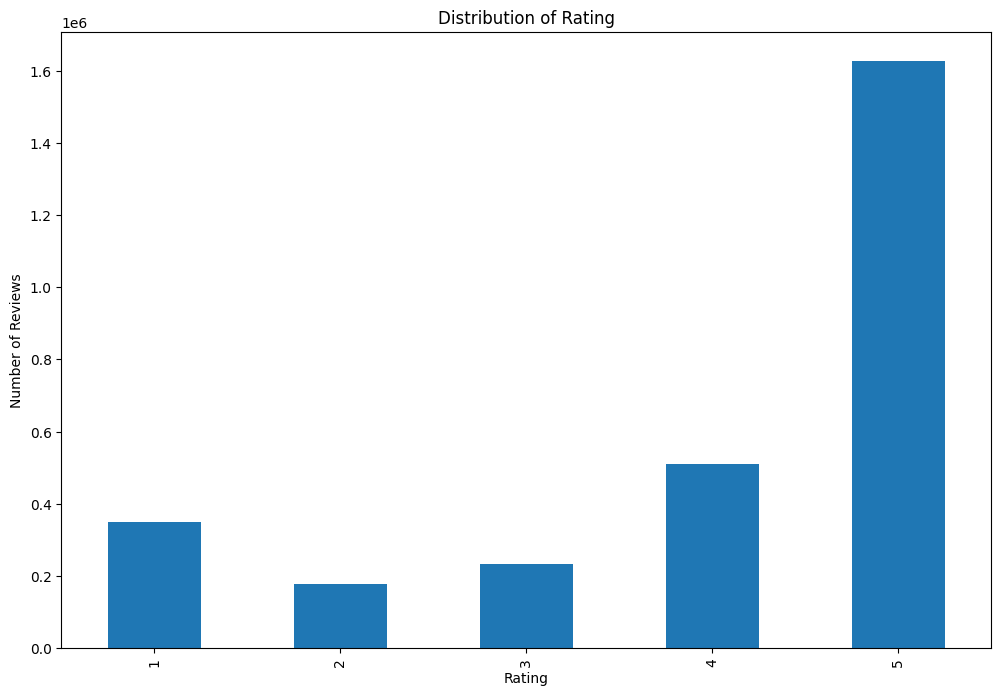

In [ ]:


plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df['star_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

<Axes: >

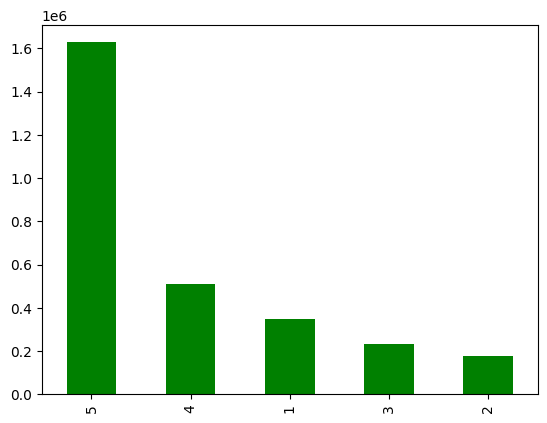

In [ ]:
df.star_rating.value_counts().plot.bar(color = 'green')

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Conv1D, MaxPooling1D
# from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [ ]:
df = df.sample(n = 100000, random_state = 2)

In [ ]:
%%time
# Clean the text data
df['review_body'] = df['review_body'].apply(lambda x: x.lower()) # Convert text to lowercase
df['review_body'] = df['review_body'].apply(lambda x: ''.join([i for i in x if i.isalpha() or i.isspace()])) # Remove non-alphabetic characters
df['review_body'] = df['review_body'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) # Remove short words

CPU times: user 8.57 s, sys: 104 ms, total: 8.67 s
Wall time: 10.3 s


In [ ]:
df.head()

,review_body,star_rating
2589351,fantastic concept support from manufacturer in...,1
828554,these headphones are amazing everything about ...,5
2310379,nice product and fortunately got less price wo...,4
975212,looks different than the original plug had but...,5
2508963,used this clip onto revue keyboard works great...,5


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-09-11 10:45:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-09-11 10:45:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-09-11 10:45:45--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Create the training and testing datasets
# train_size = int(len(df) * 0.8) # Use 80% of the data for training
# train_data = df['review_body'][:train_size]
# test_data = df['review_body'][train_size:]
# train_labels = np.array(df['star_rating'][:train_size] <= 2) # Negative reviews are labeled as True
# test_labels = np.array(df['star_rating'][train_size:] <= 2)

#Preprocess the data
reviews = df['review_body'].values
labels = df['star_rating'].apply(lambda x: 0 if x <= 2 else 1).values




# Tokenize the text data
tokenizer = Tokenizer(num_words=10000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, split=' ', char_level=False
                      )
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create word embedding matrix
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

embedding_dim = 100  # Adjust the embedding dimension as needed
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Load pre-trained word embeddings (e.g., GloVe embeddings)
# Replace 'glove.6B.100d.txt' with the path to your pre-trained word embeddings file
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Split the data into training and testing sets
train_size = int(0.8 * len(sequences))

X_train = sequences[:train_size]
y_train = labels[:train_size]
X_test = sequences[train_size:]
y_test = labels[train_size:]






In [ ]:
from keras import backend as K

def recall_m(y_true,y_pred):
  true_pos = K.sum(K.round(K.clip(y_true*y_pred,0,1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_pos / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_pos = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_pos / (predicted_positives + K.epsilon())
  return precision


def f1_m(y_true, y_pred):
  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Build the RNN model
%%time
with tf.device("/device:GPU:0"):
  model = Sequential()
  model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix],trainable = False))

  model.add(Dropout(0.35))
  model.add(Conv1D(filters =64 ,kernel_size = 5,padding='valid',activation='relu',strides=1))
  model.add(MaxPooling1D(pool_size= 4))

  model.add(LSTM(64))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr=0.01),
                metrics= ['accuracy',f1_m,precision_m, recall_m])

  model.summary()
  # Train the model
  # rnn_mdl = model.fit(train_seq, train_labels,
  #           validation_data=(test_seq, test_labels),
  #           epochs=50,
  #           batch_size=64)

  rnn_mdl = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8388000   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 64)          0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

def plot_mdl(rnn_mdl):
  accuracy = rnn_mdl.history['accuracy']
  val_accuracy = rnn_mdl.history['val_accuracy']
  loss = rnn_mdl.history['loss']
  val_loss = rnn_mdl.history['val_loss']
  x = range(1,len(accuracy)+1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, accuracy, 'b', label='Train_accuracy')
  plt.plot(x, val_accuracy, 'ro', label='Val_accuracy')
  plt.title('Training vs validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Train_loss')
  plt.plot(x, val_loss, 'o', label='Val_loss')
  plt.title('Training vs validation loss')
  plt.legend()



--Classify negative and non-negative customer reviews, Model 1--
Training Accuracy: 0.9686 Training F1 Score: 0.9804
Training Precision: 0.9807 Training Recall: 0.9810
625/625 [==============================] - 9s 15ms/step - loss: 0.2400 - accuracy: 0.9082 - f1_m: 0.9432 - precision_m: 0.9393 - recall_m: 0.9491
Test Loss: 0.23995427787303925, Test Accuracy: 0.9081500172615051
Test Precision: 0.9393 Test Recall: 0.9491


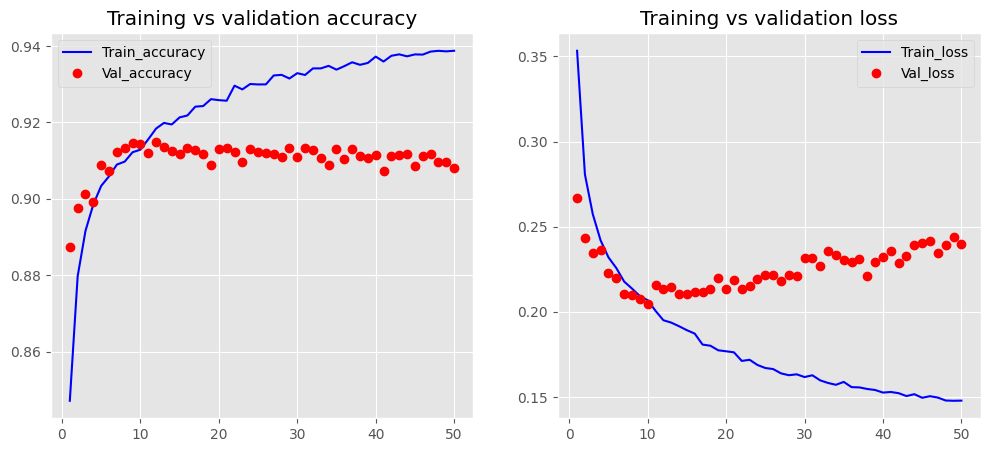

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_train, y_train,verbose=False)

print("--Classify negative and non-negative customer reviews, Model 1--")
print("Training Accuracy: {:.4f} Training F1 Score: {:.4f}".format(accuracy,f1_score))
print("Training Precision: {:.4f} Training Recall: {:.4f}".format(precision, recall))

# Evaluate the model
loss, accuracy,f1_score, precision, recall = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
print("Test Precision: {:.4f} Test Recall: {:.4f}".format(precision, recall))

plot_mdl(rnn_mdl)



dict_keys(['loss', 'accuracy', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_accuracy', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


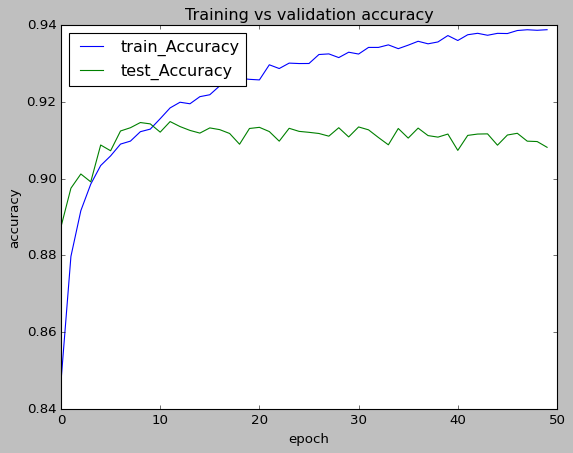

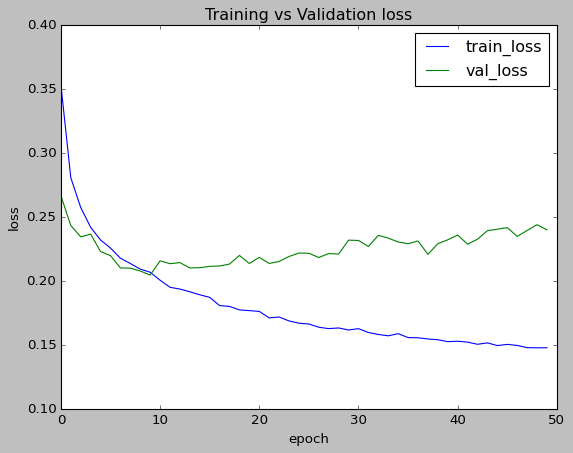

In [ ]:
# Visualize training history

print(rnn_mdl.history.keys())
# summarize history for accuracy
plt.plot(rnn_mdl.history['accuracy'])
plt.plot(rnn_mdl.history['val_accuracy'])
plt.title('Training vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_Accuracy', 'test_Accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(rnn_mdl.history['loss'])
plt.plot(rnn_mdl.history['val_loss'])
plt.title('Training vs Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.style.use('classic')
# plt.grid(False)

plt.show()

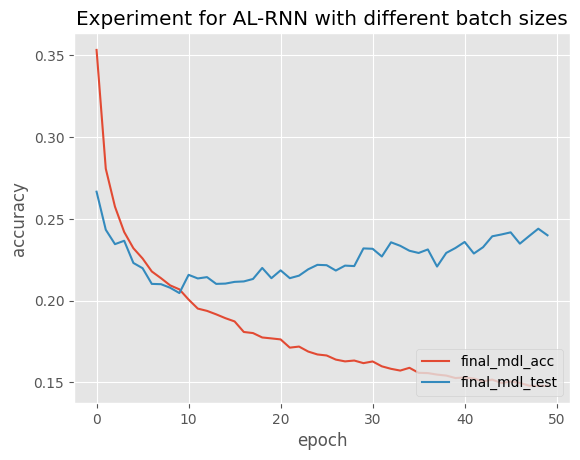

In [ ]:
# summarize history for accuracy
plt.plot(rnn_mdl.history['loss'])
plt.plot(rnn_mdl.history['val_loss'])

plt.title('Experiment for AL-RNN with different batch sizes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['final_mdl_acc','final_mdl_test'], loc='lower right')
plt.show()

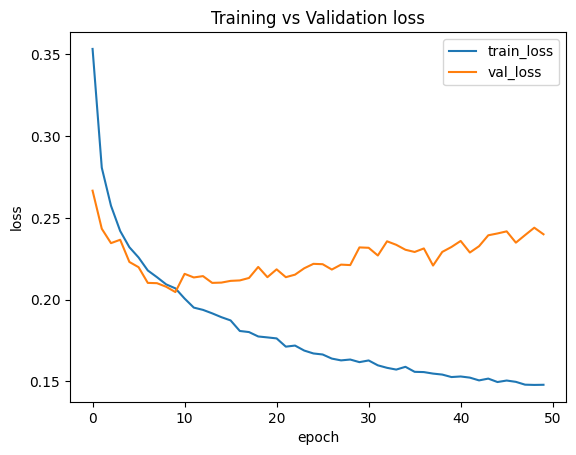

In [ ]:
  # summarize history for loss
# plt.style.use()
plt.rcdefaults()
plt.plot(rnn_mdl.history['loss'])
plt.plot(rnn_mdl.history['val_loss'])
plt.title('Training vs Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')

# plt.grid(False)
# plt.style.use('classic')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score,auc ,roc_curve,precision_score, recall_score,confusion_matrix


In [ ]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
# Accuracy data for Group 1
group1_accuracy = [0.9079, 0.9678, 0.9395,9082,0.9101]

# Accuracy data for Group 2
group2_accuracy = [0.8795,0.8800,0.8810,0.8730,0.8795]

# Perform t-test
t_statistic, p_value_t = ttest_ind(group1_accuracy, group2_accuracy)

# Perform Mann-Whitney U test
u_statistic, p_value_u = mannwhitneyu(group1_accuracy, group2_accuracy)

# Print the results
print("T-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_t)

print("\nMann-Whitney U Test:")
print("U-Statistic:", u_statistic)
print("P-Value:", p_value_u)

In [ ]:
from scipy import stats

# total number of test reviews
test_reviews = 2000
# Number of successes (accurately predicted reviews) = int(0.9079 * test_reviews)
accurate_predictions = 1815
# Null hypothesis (expected probability of success)
null_hypothesis = 0.5

# Perform binomial test
p_value = stats.binom_test(accurate_predictions, test_reviews, null_hypothesis)

# Calculate the expected number of successes under the null hypothesis
expected_successes = null_hypothesis * test_reviews

# Calculate the test statistic
test_statistic = (accurate_predictions - expected_successes) / (test_reviews * null_hypothesis * (1 - null_hypothesis))**0.5

print("Binomial Test:")
# Print the test statistic
print("Test statistic:", test_statistic)
# Print the p-value
print("P-value:", p_value)